In [ ]:
import matplotlib.pyplot as plt


In [37]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [38]:
print("Ukuran Citra Train",train_images.shape)
print("Ukuran Label Train",train_labels.shape)

print("Ukuran Citra Test",test_images.shape)
print("Ukuran Label Test",test_labels.shape)

Ukuran Citra Train (60000, 28, 28)
Ukuran Label Train (60000,)
Ukuran Citra Test (10000, 28, 28)
Ukuran Label Test (10000,)


Menampilkan Data trainning

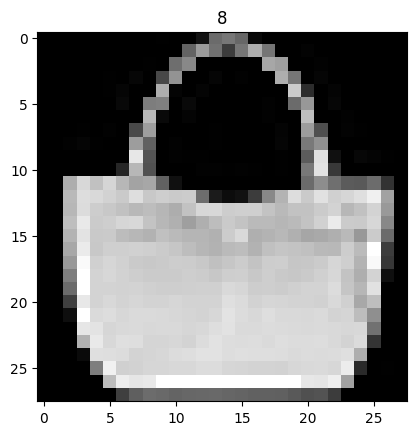

In [39]:
plt.imshow(train_images[100], cmap='gray')
plt.title(train_labels[100])
plt.show()

In [40]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


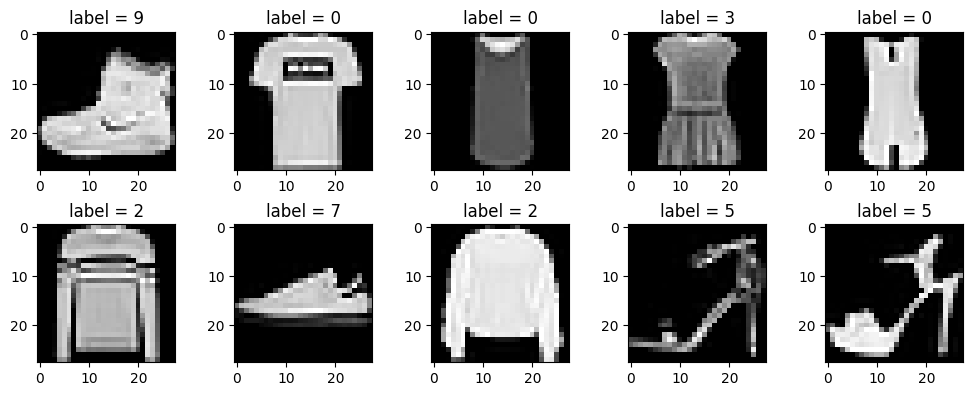

In [41]:
jumlah_baris = 2
jumlah_kolom = 5
jumlah_gambar = 10

gambar, axes = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(2*jumlah_kolom,2*jumlah_baris))

for i in range(jumlah_gambar):
  gambar = axes[i//jumlah_kolom, i%jumlah_kolom]
  gambar.imshow(train_images[i], cmap='gray')
  gambar.set_title('label = {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

In [42]:
4//3

1

In [43]:
1//5

0

In [44]:
6%3

0

In [45]:
train_images = train_images.reshape((60000,28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype("float32") / 255

In [46]:
#Arsitektur modelnya
import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'sigmoid')
])

In [47]:
model.compile(optimizer ='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(train_images,train_labels, epochs= 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5665 - accuracy: 0.7991
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3851 - accuracy: 0.8599
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.3404 - accuracy: 0.8750
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.3122 - accuracy: 0.8848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2938 - accuracy: 0.8898


Batch size / ukuran batch = ini adalah hyperparameter yg menentukan jumlah contoh trainning yg di gunakan dalam 1 iterasi

In [50]:
prediksi = model(test_images)
prediksi = prediksi.numpy() #supaya hasilnya array
prediksi_label = np.argmax(prediksi, axis=1)
prediksi_betul = prediksi_label = test_labels
print(f"accuracy:{prediksi_betul.mean():.2f}")

accuracy:4.50
